In [9]:
from fastai import *
from fastai.tabular import *
import numpy as np
import pandas as pd
import os
import math
import inspect

In [10]:
path = os.getcwd()
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [11]:
test = test.replace(float('nan'), 0)
train = train.replace(float('nan'), 0)
tmp =[]
tmp2 = []
cnt = set()

In [12]:
for ind,y in test.iterrows():
    tmp.append(str(test.iloc[ind]['Cabin'])[0])
    temp=str(test.iloc[ind]['Name'])
    temp = temp.split(sep=',')[1]
    temp = temp.split()[0]
    if temp[-1].isalpha()==False:
        temp=temp[:-1]
    tmp2.append(temp)
    cnt.add(temp)
print(cnt)

{'Miss', 'Master', 'Rev', 'Dr', 'Mr', 'Mrs', 'Ms', 'Dona', 'Col'}


In [13]:
test['Flor']=tmp
test['Name2']=tmp2

In [14]:
tmp=[]
tmp2=[]
cnt = set()
for ind,y in train.iterrows():
    tmp.append(str(train.iloc[ind]['Cabin'])[0])
    temp=str(train.iloc[ind]['Name'])
    temp = temp.split(sep=',')[1]
    temp = temp.split()[0]
    if temp[-1].isalpha()==False:
        temp=temp[:-1]
    tmp2.append(temp)
    cnt.add(temp)
print(cnt)

{'Miss', 'Master', 'Sir', 'Rev', 'Lady', 'Don', 'Capt', 'Dr', 'Jonkheer', 'Mr', 'Mrs', 'Mlle', 'Mme', 'the', 'Ms', 'Major', 'Col'}


In [15]:
train['Flor'] = tmp
train['Name2'] = tmp2

In [16]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Flor,Name2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,0,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,0,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,0,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,0.00,0,0,330877,8.4583,0,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,E,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,0,S,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,0,S,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,0,C,0,Mrs


In [17]:
cat_names = ['Pclass','Sex','Flor','Embarked','Name2']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']
dep_var = 'Survived'
procs = [FillMissing, Categorify, Normalize]

In [18]:
data_test = TabularList.from_df(test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [19]:
data = (TabularList.from_df(train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.2, seed=8)
                           .label_from_df(cols=dep_var)
                           .add_test(data_test)
                           .databunch(bs=64))

In [20]:
loss_func = nn.CrossEntropyLoss

In [25]:
learn = tabular_learner(data, layers=[1000, 500], metrics=accuracy, ps=[0.001,0.01] , emb_drop=0.1, wd=0.1, loss_func=loss_func)

In [50]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


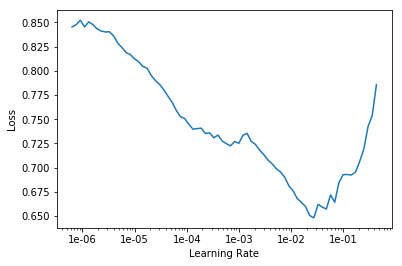

In [26]:
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(5, max_lr=(2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.602734,0.625846,0.668539,00:00
1,0.602464,0.626187,0.696629,00:00
2,0.595892,0.553535,0.696629,00:00
3,0.577050,0.553018,0.730337,00:00
4,0.562710,0.555716,0.741573,00:00


In [64]:
learn.load('titanic-wd0.1-name')

Learner(data=TabularDataBunch;

Train: LabelList (713 items)
x: TabularList
Pclass 3; Sex male; Flor 0; Embarked S; Name2 Mr; Age -0.1044; SibSp 0.4526; Parch -0.4759; Fare -0.5693; ,Pclass 1; Sex female; Flor C; Embarked C; Name2 Mrs; Age 0.7896; SibSp 0.4526; Parch -0.4759; Fare 0.9519; ,Pclass 3; Sex female; Flor 0; Embarked S; Name2 Miss; Age 0.1191; SibSp -0.4747; Parch -0.4759; Fare -0.5533; ,Pclass 1; Sex female; Flor C; Embarked S; Name2 Mrs; Age 0.6220; SibSp 0.4526; Parch -0.4759; Fare 0.5199; ,Pclass 3; Sex male; Flor 0; Embarked S; Name2 Mr; Age 0.6220; SibSp -0.4747; Parch -0.4759; Fare -0.5503; 
y: CategoryList
0,1,1,1,0
Path: /notebooks/course-v3/nbs/djovak vezba mnist;

Valid: LabelList (178 items)
x: TabularList
Pclass 3; Sex male; Flor 0; Embarked Q; Name2 Mr; Age -1.3336; SibSp -0.4747; Parch -0.4759; Fare -0.5574; ,Pclass 3; Sex male; Flor 0; Embarked C; Name2 Mr; Age -1.3336; SibSp -0.4747; Parch -0.4759; Fare -0.5699; ,Pclass 3; Sex male; Flor 0; Embarked S; Name2

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_tab_top_losses(80)

,Prediction,Actual,Loss,Probability,Pclass,Sex,Flor,Embarked,Name2,Age,SibSp,Parch,Fare
0,0,1,2.50,0.08,2,female,0,S,Mrs,-0.0193,1.3681,3.1445,-0.2825
1,1,0,1.98,0.14,3,female,0,C,Miss,-0.8591,0.4452,0.7298,-0.3489
2,1,0,1.96,0.14,3,female,0,Q,Miss,-1.3630,-0.4776,1.9371,-0.4909
3,1,0,1.76,0.17,2,male,0,S,Mr,-0.2992,0.4452,0.7298,0.0584
4,0,1,1.62,0.20,3,female,0,S,Miss,-1.0830,3.2138,1.9371,-0.0431
5,0,1,1.60,0.20,3,male,0,S,Mr,1.1004,-0.4776,-0.4775,-0.4876
6,1,0,1.56,0.21,1,male,C,C,Mr,1.4363,0.4452,-0.4775,1.3783
7,1,0,1.49,0.23,1,male,0,S,Mr,0.2046,-0.4776,-0.4775,0.2545
8,1,0,1.26,0.28,3,male,0,S,Mr,-0.4672,0.4452,0.7298,-0.2541
9,1,0,1.15,0.32,2,male,0,S,Mr,-0.1873,1.3681,-0.4775,0.7546


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


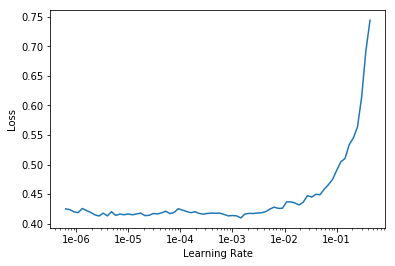

In [132]:
learn.lr_find()
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(5,max_lr=5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.393264,0.518154,0.814607,00:01
1,0.396392,0.522554,0.803371,00:01
2,0.394464,0.528275,0.797753,00:01
3,0.394896,0.525672,0.820225,00:01
4,0.393124,0.524995,0.808989,00:01


In [92]:
learn.save('titanic-1000-wd0.1-fine')

In [129]:
learn.load('titanic-wd0.1')

Learner(data=TabularDataBunch;

Train: LabelList (713 items)
x: TabularList
Pclass 3; Sex male; Flor 0; Age -0.0913; SibSp 0.4212; Parch -0.4850; Fare -0.5142; ,Pclass 1; Sex female; Flor C; Age 0.8208; SibSp 0.4212; Parch -0.4850; Fare 0.8024; ,Pclass 3; Sex female; Flor 0; Age 0.1367; SibSp -0.4673; Parch -0.4850; Fare -0.5003; ,Pclass 1; Sex female; Flor C; Age 0.6498; SibSp 0.4212; Parch -0.4850; Fare 0.4285; ,Pclass 3; Sex male; Flor 0; Age 0.6498; SibSp -0.4673; Parch -0.4850; Fare -0.4977; 
y: CategoryList
0,1,1,1,0
Path: /notebooks/course-v3/nbs/djovak vezba mnist;

Valid: LabelList (178 items)
x: TabularList
Pclass 1; Sex male; Flor E; Age 1.0488; SibSp -0.4673; Parch -0.4850; Fare -0.1228; ,Pclass 3; Sex male; Flor 0; Age -0.1483; SibSp -0.4673; Parch -0.4850; Fare -0.4977; ,Pclass 2; Sex female; Flor 0; Age 0.0227; SibSp 0.4212; Parch 1.8916; Fare 0.6732; ,Pclass 3; Sex male; Flor 0; Age 0.2507; SibSp -0.4673; Parch -0.4850; Fare 0.4983; ,Pclass 3; Sex female; Flor 0; Age -0

In [62]:
ids=[]
sol=[]
for y in data_test:
    #print(y)
    ids.append(y['PassengerId'])
    sol.append(int(learn.predict(y)[1]))

tensor([0.4958, 0.5042])
tensor([0.4962, 0.5038])
tensor([0.4955, 0.5045])
tensor([0.4957, 0.5043])
tensor([0.5027, 0.4973])
tensor([0.4956, 0.5044])
tensor([0.4959, 0.5041])
tensor([0.5025, 0.4975])
tensor([0.4955, 0.5045])
tensor([0.4963, 0.5037])
tensor([0.4955, 0.5045])
tensor([0.4955, 0.5045])
tensor([0.4959, 0.5041])
tensor([0.4957, 0.5043])
tensor([0.4956, 0.5044])
tensor([0.4960, 0.5040])
tensor([0.4954, 0.5046])
tensor([0.4954, 0.5046])
tensor([0.4963, 0.5037])
tensor([0.4956, 0.5044])
tensor([0.4957, 0.5043])
tensor([0.5052, 0.4948])
tensor([0.4953, 0.5047])
tensor([0.5046, 0.4954])
tensor([0.5023, 0.4977])
tensor([0.4960, 0.5040])
tensor([0.5048, 0.4952])
tensor([0.4954, 0.5046])
tensor([0.4952, 0.5048])
tensor([0.4962, 0.5038])
tensor([0.4957, 0.5043])
tensor([0.4961, 0.5039])
tensor([0.5029, 0.4971])
tensor([0.5031, 0.4969])
tensor([0.4958, 0.5042])
tensor([0.4954, 0.5046])
tensor([0.4957, 0.5043])
tensor([0.4958, 0.5042])
tensor([0.4956, 0.5044])
tensor([0.4954, 0.5046])


tensor([0.4953, 0.5047])
tensor([0.5027, 0.4973])
tensor([0.4957, 0.5043])
tensor([0.4953, 0.5047])
tensor([0.4953, 0.5047])
tensor([0.5069, 0.4931])
tensor([0.4953, 0.5047])
tensor([0.4953, 0.5047])
tensor([0.4953, 0.5047])
tensor([0.4957, 0.5043])
tensor([0.4973, 0.5027])
tensor([0.5030, 0.4970])
tensor([0.5026, 0.4974])
tensor([0.4958, 0.5042])
tensor([0.4953, 0.5047])
tensor([0.4956, 0.5044])
tensor([0.4953, 0.5047])
tensor([0.4955, 0.5045])
tensor([0.5043, 0.4957])
tensor([0.4953, 0.5047])
tensor([0.4951, 0.5049])
tensor([0.5027, 0.4973])
tensor([0.5032, 0.4968])
tensor([0.4949, 0.5051])
tensor([0.4962, 0.5038])
tensor([0.4955, 0.5045])
tensor([0.4957, 0.5043])
tensor([0.4962, 0.5038])
tensor([0.4595, 0.5405])
tensor([0.5026, 0.4974])
tensor([0.4954, 0.5046])
tensor([0.4957, 0.5043])
tensor([0.4956, 0.5044])
tensor([0.4971, 0.5029])
tensor([0.4960, 0.5040])
tensor([0.4957, 0.5043])
tensor([0.5043, 0.4957])
tensor([0.4951, 0.5049])
tensor([0.4958, 0.5042])
tensor([0.4945, 0.5055])


In [75]:
final = DataFrame({'PassengerId':ids, 'Survived':sol})
final.to_csv('submission.csv',index=False, header=True)